In [36]:
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('ggplot')
pd.set_option("display.max_columns",100)

In [ ]:
dataset = pd.read_csv('coaster_db.csv')
dataset

**Passo 1: Entender os dados**

In [3]:
# Podemos ver o numero de colunas e linhas do nosso dataframe
dataset.shape

(1087, 56)

In [4]:
# Podemos ver todas nossas colunas
dataset.columns

Index(['coaster_name', 'Length', 'Speed', 'Location', 'Status', 'Opening date',
       'Type', 'Manufacturer', 'Height restriction', 'Model', 'Height',
       'Inversions', 'Lift/launch system', 'Cost', 'Trains', 'Park section',
       'Duration', 'Capacity', 'G-force', 'Designer', 'Max vertical angle',
       'Drop', 'Soft opening date', 'Fast Lane available', 'Replaced',
       'Track layout', 'Fastrack available', 'Soft opening date.1',
       'Closing date', 'Opened', 'Replaced by', 'Website',
       'Flash Pass Available', 'Must transfer from wheelchair', 'Theme',
       'Single rider line available', 'Restraint Style',
       'Flash Pass available', 'Acceleration', 'Restraints', 'Name',
       'year_introduced', 'latitude', 'longitude', 'Type_Main',
       'opening_date_clean', 'speed1', 'speed2', 'speed1_value', 'speed1_unit',
       'speed_mph', 'height_value', 'height_unit', 'height_ft',
       'Inversions_clean', 'Gforce_clean'],
      dtype='object')

In [5]:
# Verificando informações gerais do nosso dataframe
dataset.describe()

,Inversions,year_introduced,latitude,longitude,speed1_value,speed_mph,height_value,height_ft,Inversions_clean,Gforce_clean
count,932.000000,1087.000000,812.000000,812.000000,937.000000,937.000000,965.000000,171.000000,1087.000000,362.000000
mean,1.547210,1994.986201,38.373484,-41.595373,53.850374,48.617289,89.575171,101.996491,1.326587,3.824006
std,2.114073,23.475248,15.516596,72.285227,23.385518,16.678031,136.246444,67.329092,2.030854,0.989998
min,0.000000,1884.000000,-48.261700,-123.035700,5.000000,5.000000,4.000000,13.100000,0.000000,0.800000
25%,0.000000,1989.000000,35.031050,-84.552200,40.000000,37.300000,44.000000,51.800000,0.000000,3.400000
50%,0.000000,2000.000000,40.289800,-76.653600,50.000000,49.700000,79.000000,91.200000,0.000000,4.000000
75%,3.000000,2010.000000,44.799600,2.778100,63.000000,58.000000,113.000000,131.200000,2.000000,4.500000
max,14.000000,2022.000000,63.230900,153.426500,240.000000,149.100000,3937.000000,377.300000,14.000000,12.000000


**Passo 2: Preparando os dados**
1º Removendo colunas e linhas inuteis

In [6]:
# O copy é importante para identificarmos como um novo dataframe, e não apenas uma referência
# o uso de copy() é importante quando você precisa criar uma cópia modificável do DataFrame original, sem afetar os dados originais. 
# Isso é útil em cenários em que você deseja fazer manipulações específicas em uma cópia sem alterar o DataFrame original.

novo_dataset = dataset[['coaster_name',
    # 'Length', 'Speed',
    'Location', 'Status',
    'Opening date',
    #   'Type',
    'Manufacturer',
#     'Height restriction', 'Model', 'Height',
#        'Inversions', 'Lift/launch system', 'Cost', 'Trains', 'Park section',
#        'Duration', 'Capacity', 'G-force', 'Designer', 'Max vertical angle',
#        'Drop', 'Soft opening date', 'Fast Lane available', 'Replaced',
#        'Track layout', 'Fastrack available', 'Soft opening date.1',
#        'Closing date',
#     'Opened', 
    # 'Replaced by', 'Website',
#        'Flash Pass Available', 'Must transfer from wheelchair', 'Theme',
#        'Single rider line available', 'Restraint Style',
#        'Flash Pass available', 'Acceleration', 'Restraints', 'Name',
       'year_introduced',
        'latitude', 'longitude',
    'Type_Main',
       'opening_date_clean',
    #'speed1', 'speed2', 'speed1_value', 'speed1_unit',
       'speed_mph', 
    #'height_value', 'height_unit',
    'height_ft',
       'Inversions_clean', 'Gforce_clean']].copy()

novo_dataset

,coaster_name,Location,Status,Opening date,Manufacturer,year_introduced,latitude,longitude,Type_Main,opening_date_clean,speed_mph,height_ft,Inversions_clean,Gforce_clean
0,Switchback Railway,Coney Island,Removed,"June 16, 1884",LaMarcus Adna Thompson,1884,40.5740,-73.9780,Wood,1884-06-16,6.0,NaN,0,2.9
1,Flip Flap Railway,Sea Lion Park,Removed,1895,Lina Beecher,1895,40.5780,-73.9790,Wood,1895-01-01,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),"Cleveland, Ohio, United States",Closed,NaN,NaN,1896,41.5800,-81.5700,Other,NaN,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),Other,Removed,1901,Edwin Prescott,1901,40.5745,-73.9780,Steel,1901-01-01,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),Other,Removed,1901,Edwin Prescott,1901,39.3538,-74.4342,Steel,1901-01-01,NaN,NaN,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1082,American Dreier Looping,Other,NaN,NaN,Anton Schwarzkopf,2022,NaN,NaN,Steel,NaN,53.0,NaN,3,4.7
1083,Pantheon (roller coaster),Busch Gardens Williamsburg,Under construction,2022,Intamin,2022,37.2339,-76.6426,Steel,2022-01-01,73.0,NaN,2,NaN
1084,Tron Lightcycle Power Run,Other,NaN,"June 16, 2016",Vekoma,2022,NaN,NaN,Steel,2016-06-16,59.3,NaN,0,4.0
1085,Tumbili,Kings Dominion,Under construction,NaN,S&S – Sansei Technologies,2022,NaN,NaN,Steel,NaN,34.0,NaN,0,NaN


**Para remover uma unica coluna, fazemos:**

df.drop(["Nome da coluna"], axis = 1)

**Vamos eleminar a coluna opening date**

In [7]:
# Eliminando a coluna opening date, axis =1 é para identificar como coluna
novo_dataset.drop(["Opening date"], axis=1)

,coaster_name,Location,Status,Manufacturer,year_introduced,latitude,longitude,Type_Main,opening_date_clean,speed_mph,height_ft,Inversions_clean,Gforce_clean
0,Switchback Railway,Coney Island,Removed,LaMarcus Adna Thompson,1884,40.5740,-73.9780,Wood,1884-06-16,6.0,NaN,0,2.9
1,Flip Flap Railway,Sea Lion Park,Removed,Lina Beecher,1895,40.5780,-73.9790,Wood,1895-01-01,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),"Cleveland, Ohio, United States",Closed,NaN,1896,41.5800,-81.5700,Other,NaN,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),Other,Removed,Edwin Prescott,1901,40.5745,-73.9780,Steel,1901-01-01,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),Other,Removed,Edwin Prescott,1901,39.3538,-74.4342,Steel,1901-01-01,NaN,NaN,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1082,American Dreier Looping,Other,NaN,Anton Schwarzkopf,2022,NaN,NaN,Steel,NaN,53.0,NaN,3,4.7
1083,Pantheon (roller coaster),Busch Gardens Williamsburg,Under construction,Intamin,2022,37.2339,-76.6426,Steel,2022-01-01,73.0,NaN,2,NaN
1084,Tron Lightcycle Power Run,Other,NaN,Vekoma,2022,NaN,NaN,Steel,2016-06-16,59.3,NaN,0,4.0
1085,Tumbili,Kings Dominion,Under construction,S&S – Sansei Technologies,2022,NaN,NaN,Steel,NaN,34.0,NaN,0,NaN


In [8]:
# Podemos observar que a coluna opening_date_clean está em forma de objeto, podemos passar para data
novo_dataset.dtypes

coaster_name           object
Location               object
Status                 object
Opening date           object
Manufacturer           object
year_introduced         int64
latitude              float64
longitude             float64
Type_Main              object
opening_date_clean     object
speed_mph             float64
height_ft             float64
Inversions_clean        int64
Gforce_clean          float64
dtype: object

In [9]:
novo_dataset["opening_date_clean"] = pd.to_datetime(novo_dataset["opening_date_clean"])
novo_dataset["opening_date_clean"]

0      1884-06-16
1      1895-01-01
2             NaT
3      1901-01-01
4      1901-01-01
          ...    
1082          NaT
1083   2022-01-01
1084   2016-06-16
1085          NaT
1086   2022-01-01
Name: opening_date_clean, Length: 1087, dtype: datetime64[ns]

**Vamos renomear algumas colunas, é muito útil para trabalhar com dados aprensentáveis**


dt.rename(columns={"coluna": "nova_coluna"})

In [10]:
# Renomeando a coluna coaster_name, podemos utilizar o inplace=True para não precisar atribuir novamente ao dataframe
novo_dataset.rename(columns={"coaster_name": "coaster"}, inplace=True)

**Vamos encontrar valores nulos ou ausentes, fazemos:**

df.isna()

In [11]:
# Aqui podemos verificar onde não há informação com o metodo isna()
novo_dataset.isna().sum().sort_values()

coaster                 0
Location                0
year_introduced         0
Type_Main               0
Inversions_clean        0
Manufacturer           59
speed_mph             150
Status                213
Opening date          250
opening_date_clean    250
latitude              275
longitude             275
Gforce_clean          725
height_ft             916
dtype: int64

**Lidando com dados duplicados**

Podemos lidar com dados duplicados com o seguinto metodo:

linhas_duplicadas = df.duplicated()
sem_duplicadas = df.drop_duplicates(["Coluna1", "Coluna2"])

Podemos utilizar o subset também

sem_duplicados = df.drop_duplicates(subset=["Coluna1", "Coluna2"])

In [19]:
# Fazendo com o subset
novo_dataset.duplicated(subset=["coaster", "Location", "Opening date"]).sum()
# Fazendo sem o subset, tem o mesmo resultado
novo_dataset.duplicated(["coaster", "Location", "Opening date"]).sum()

-98

**Visualização dos dados**

* Plotando histogramas

In [25]:
# Verificando a quantidade de coaster lançados em cada ano
novo_dataset["year_introduced"].value_counts().head(10)

1999    49
2000    47
1998    32
2011    31
2001    30
2002    30
2007    30
2008    30
2004    27
2012    27
Name: year_introduced, dtype: int64

<AxesSubplot: >

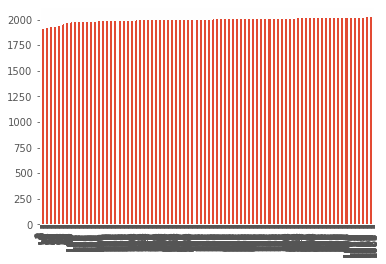

In [38]:
# Vamos plotar um gráfico de barra simples da coluna year_introduced
novo_dataset["year_introduced"].plot(kind="bar")

**Vamos criar um grafico com os 10 primeiros anos para ficar mais legivel**

<AxesSubplot: title={'center': 'Top 10 years'}>

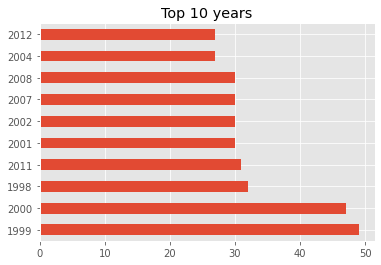

In [41]:
novo_dataset["year_introduced"].value_counts().head(10).plot(kind="barh", title= "Top 10 years")